In [120]:
from calibration import CameraCalibration
import thresholds as thr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg


In [121]:
# Convert Images color spaces
def highlight_features(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    hls = cv2.cvtColor(image,cv2.COLOR_BGR2HLS)
    s_channel = hls[:,:,2]
    sx_binary = thr.abs_sobel_thresh(gray,'x',(20,100))
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    color_binary = np.dstack(( np.zeros_like(sx_binary), sx_binary, s_binary)) * 255
    combined_binary = np.zeros_like(sx_binary)
    combined_binary[(s_binary == 1) | (sx_binary == 1)] = 1
    return color_binary, combined_binary

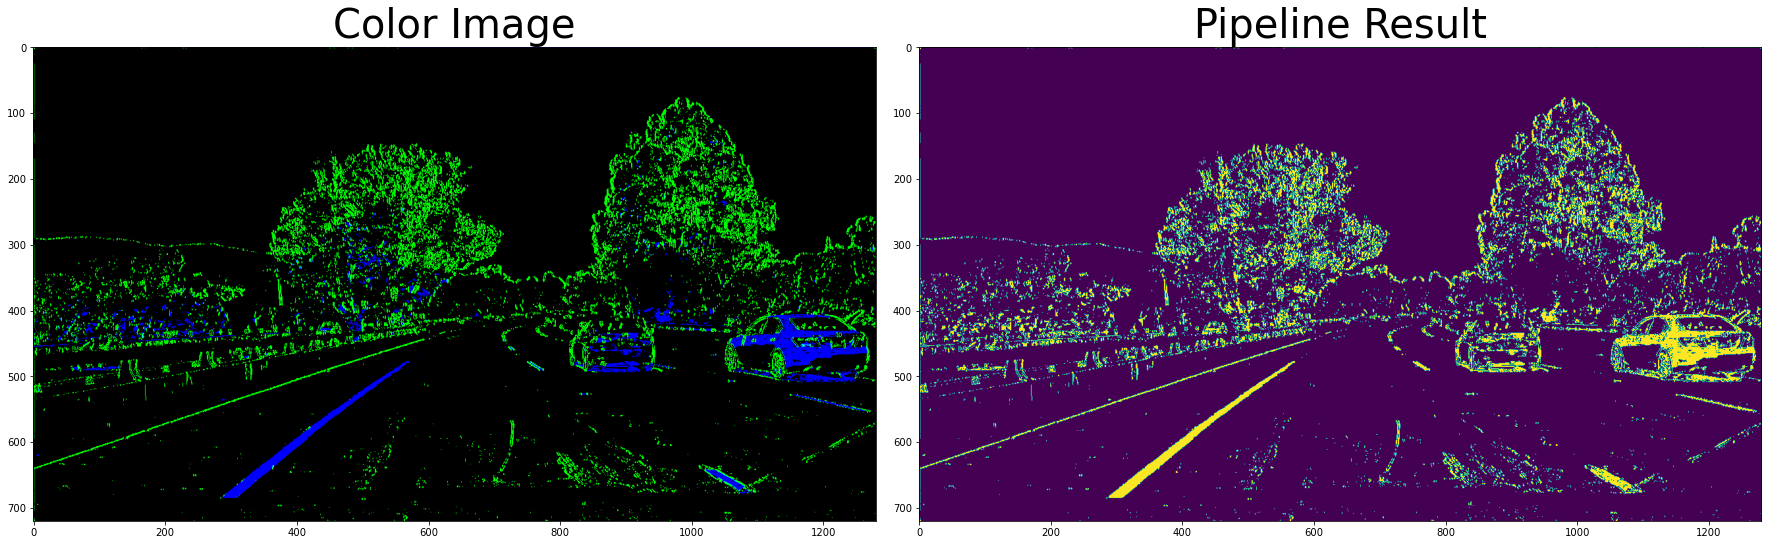

In [125]:
img = cv2.imread('./test_images/test1.jpg')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
color, combined = highlight_features(img)
ax1.imshow(color)
ax1.set_title('Color Image', fontsize=40)
ax2.imshow(combined)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

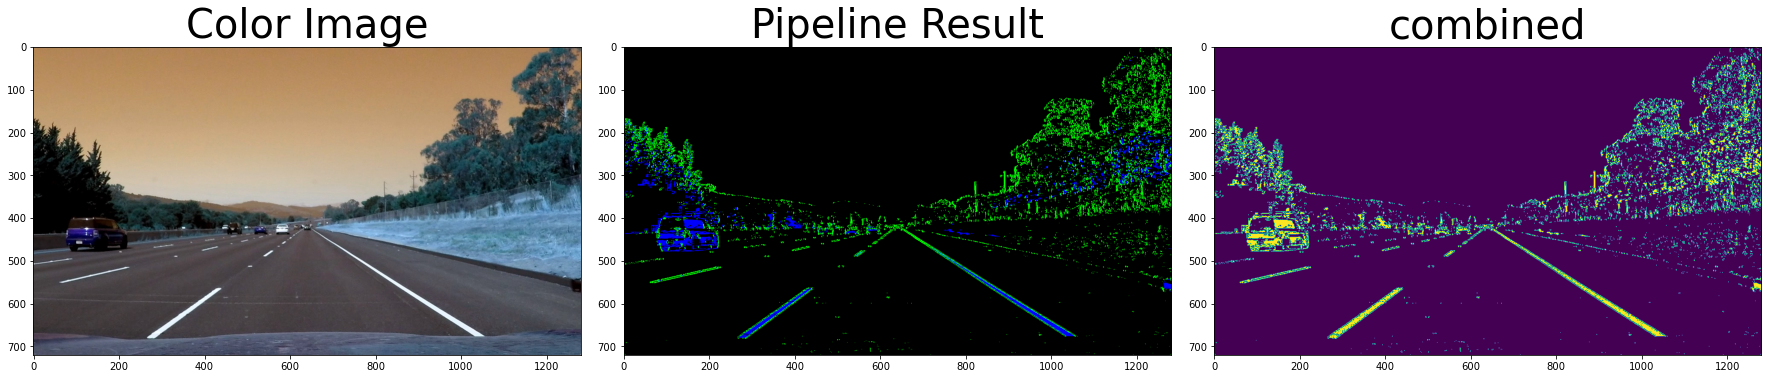

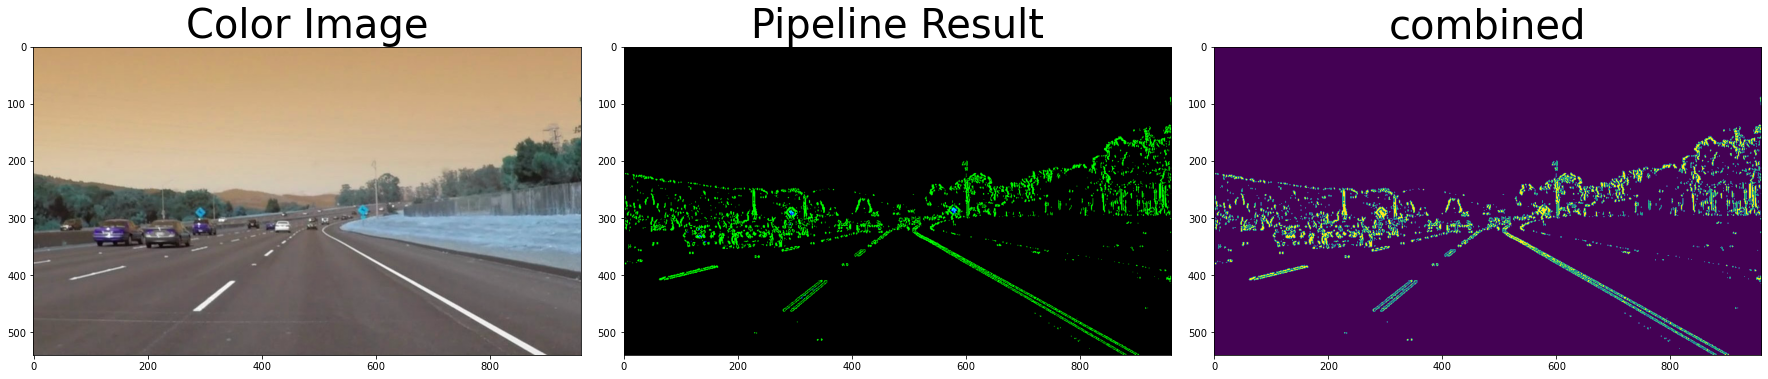

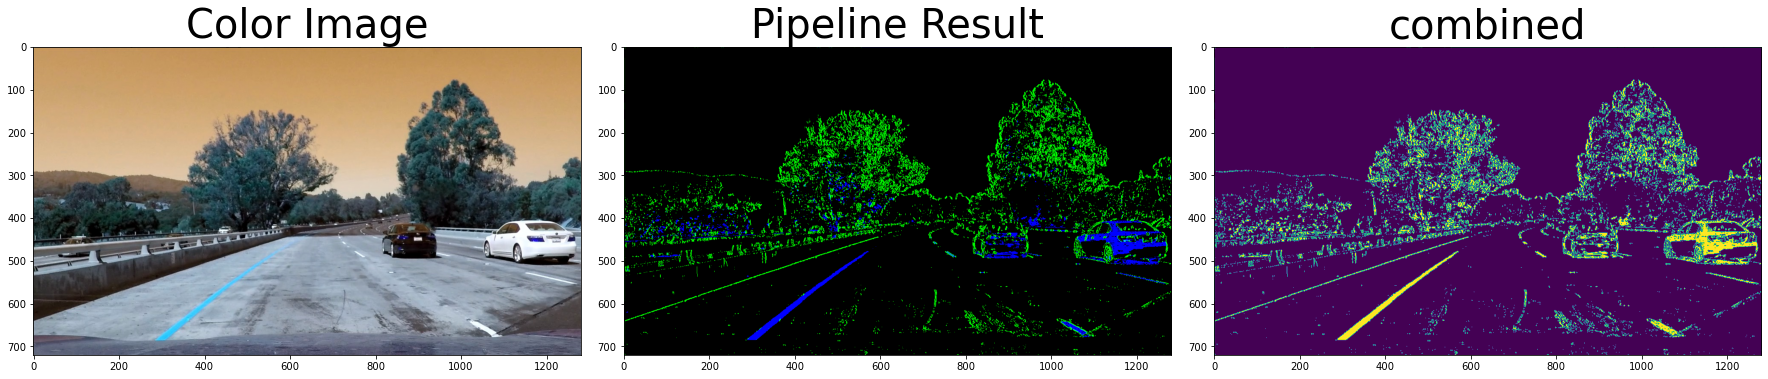

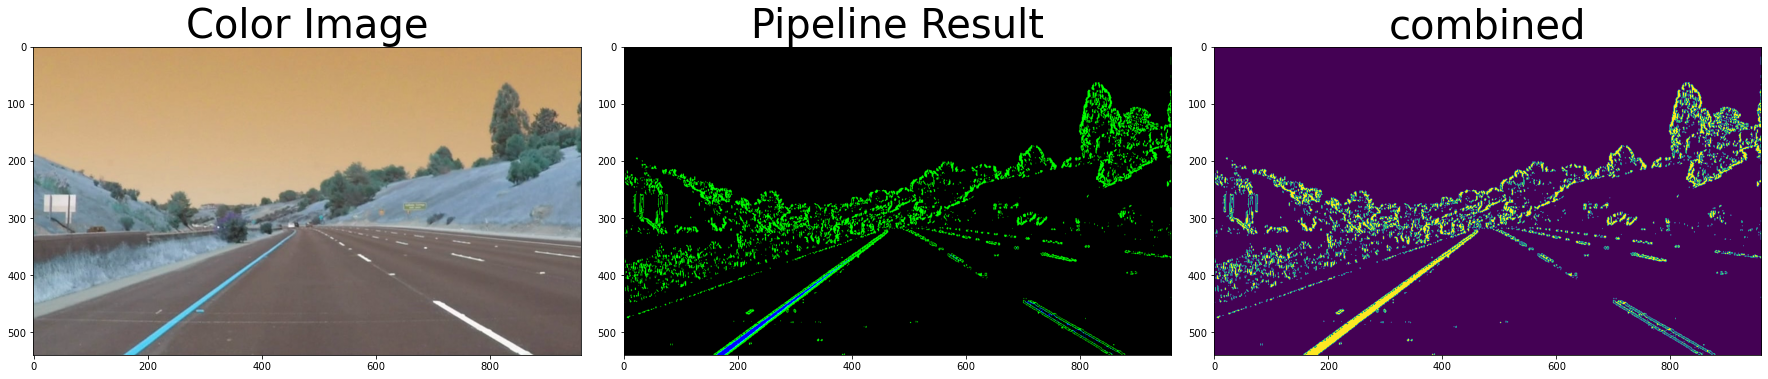

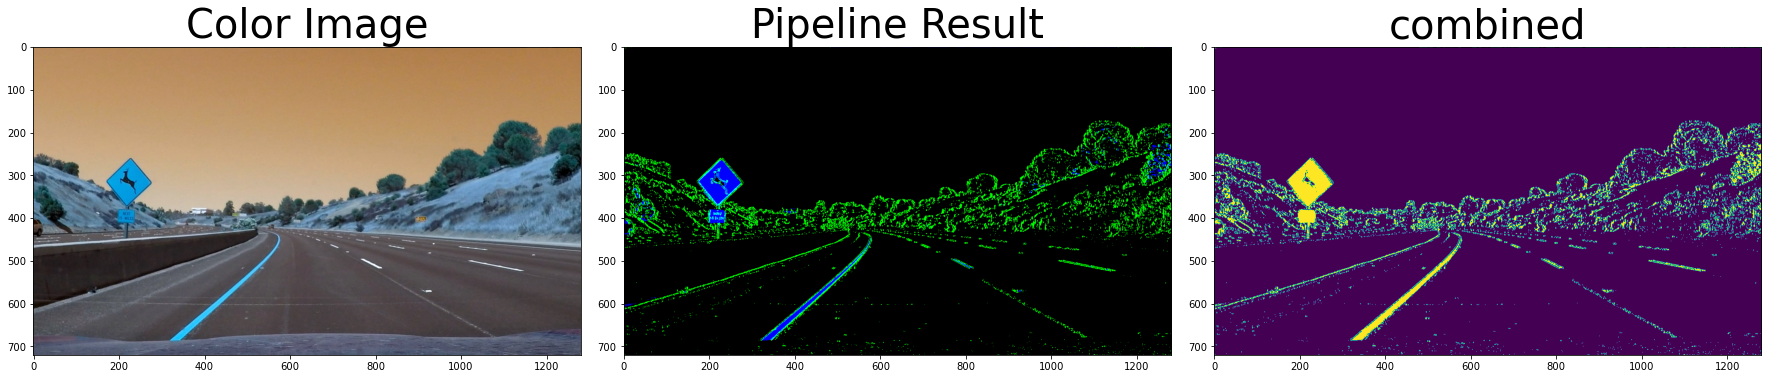

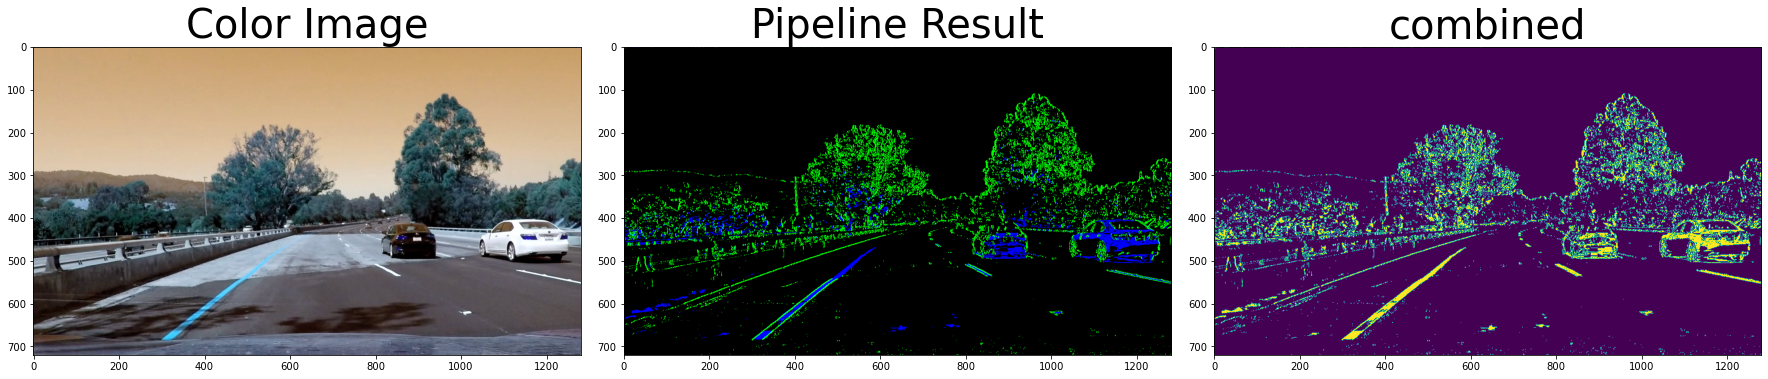

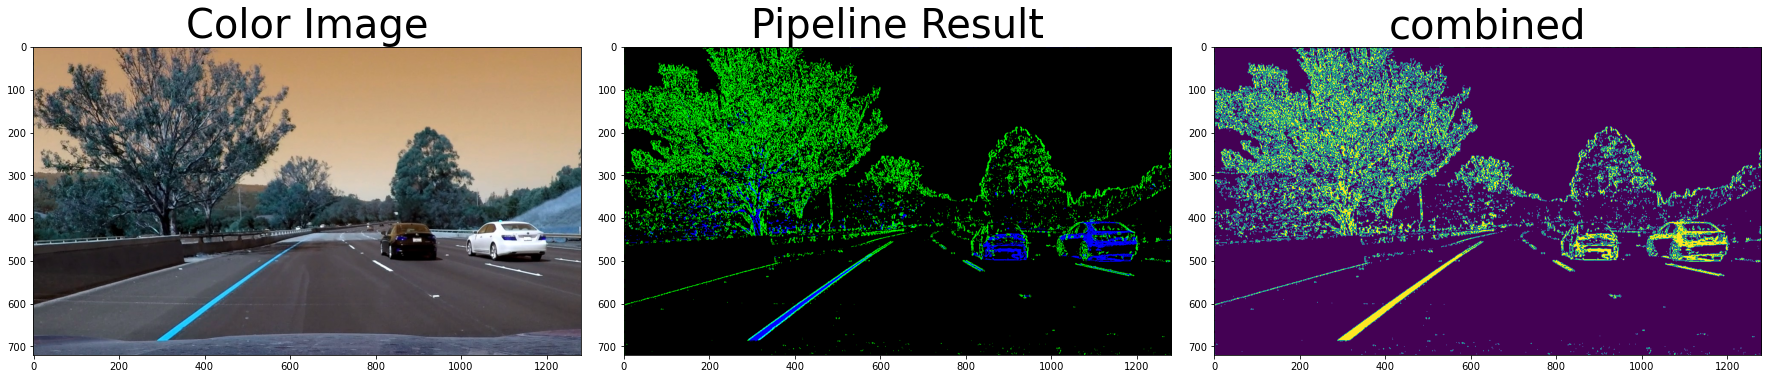

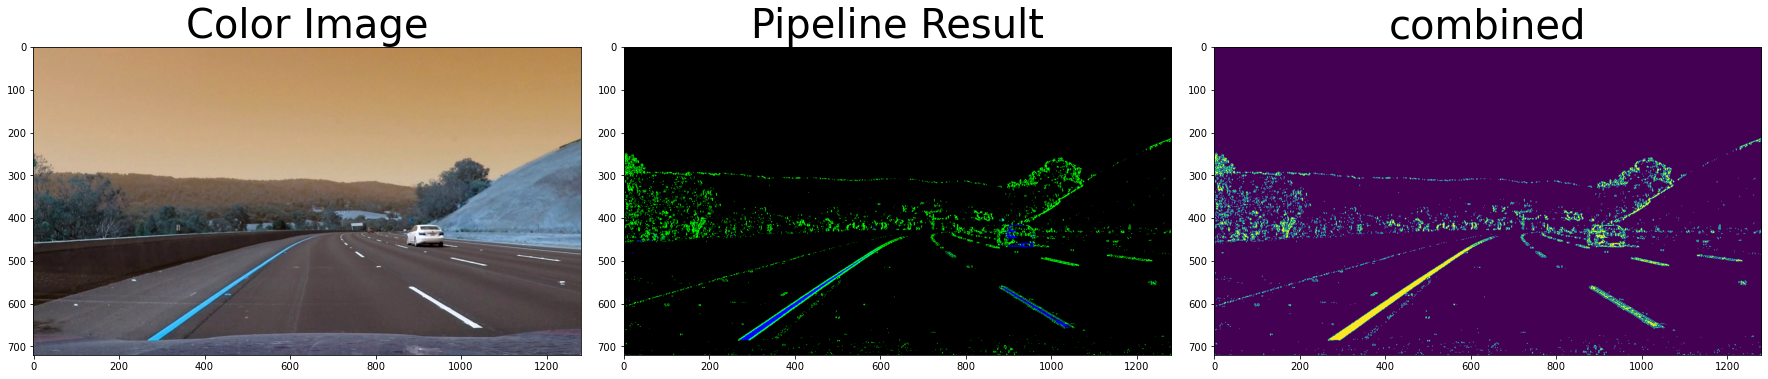

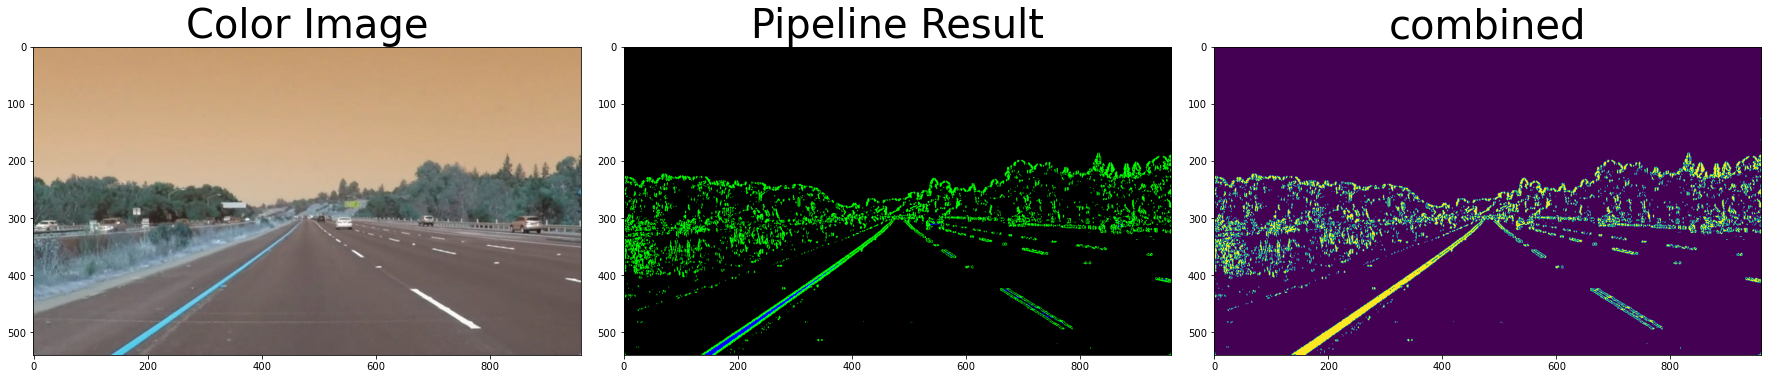

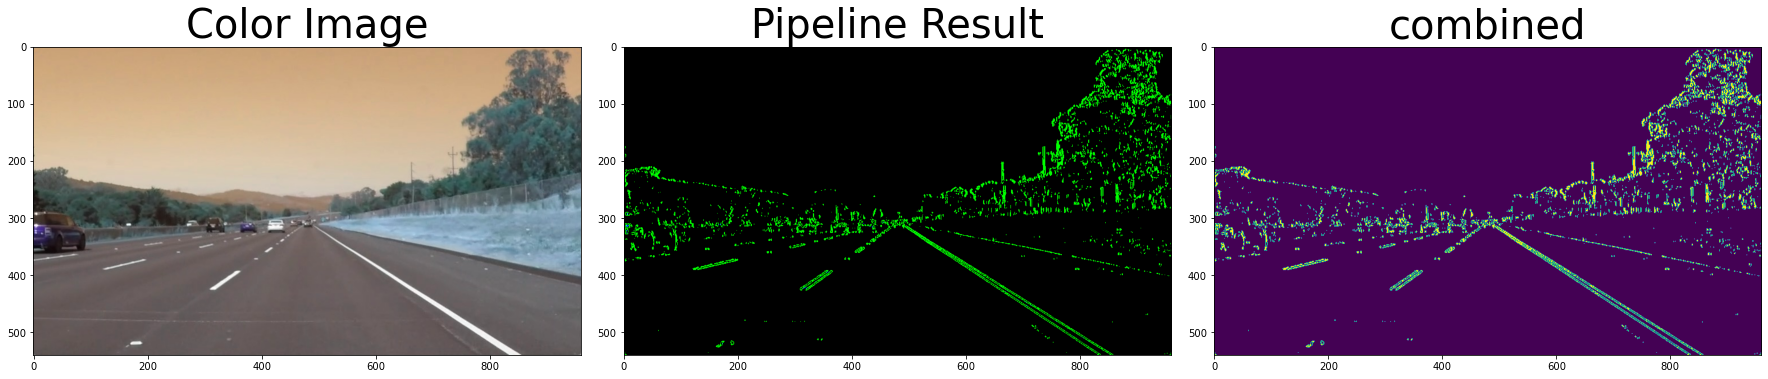

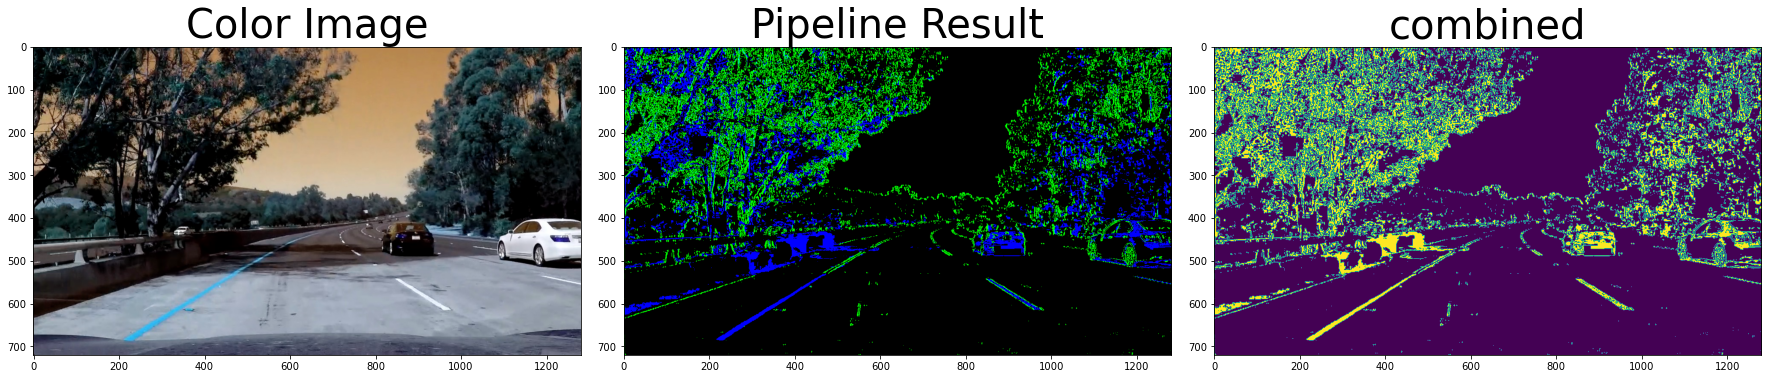

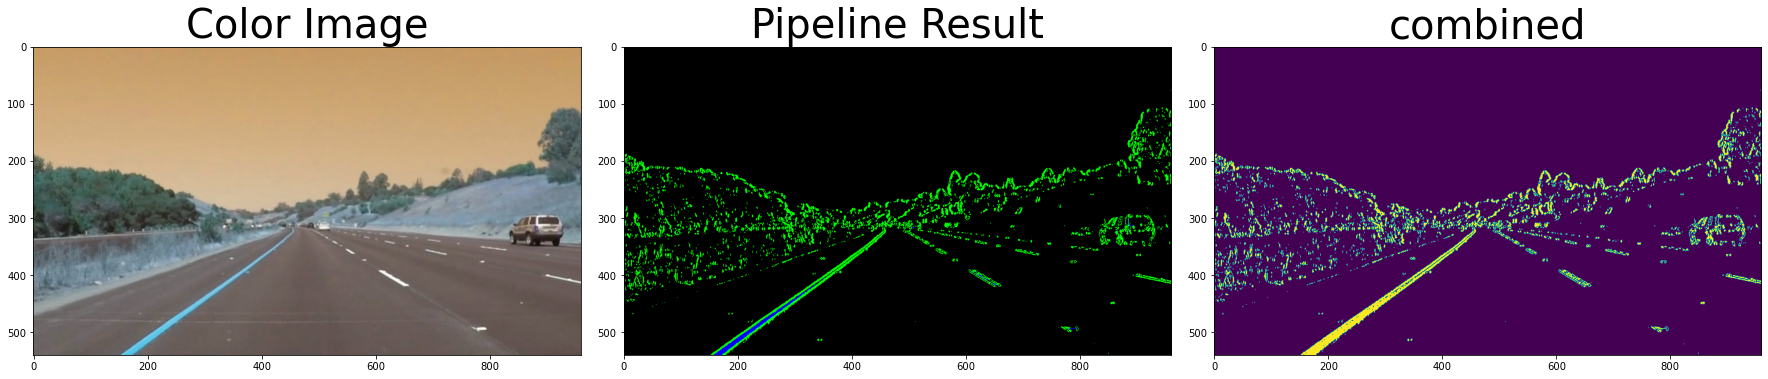

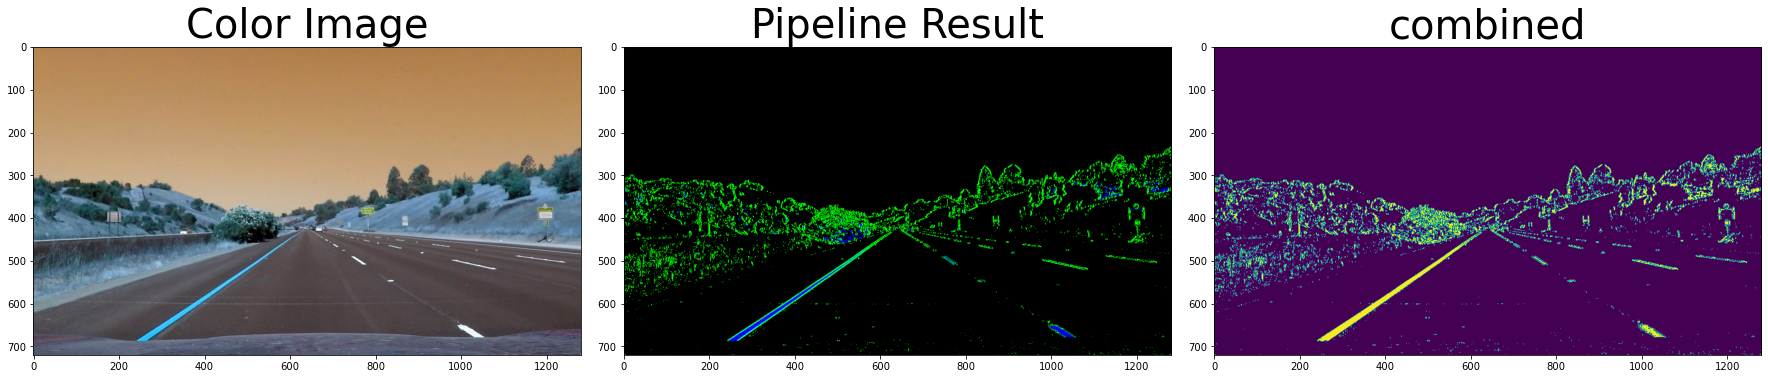

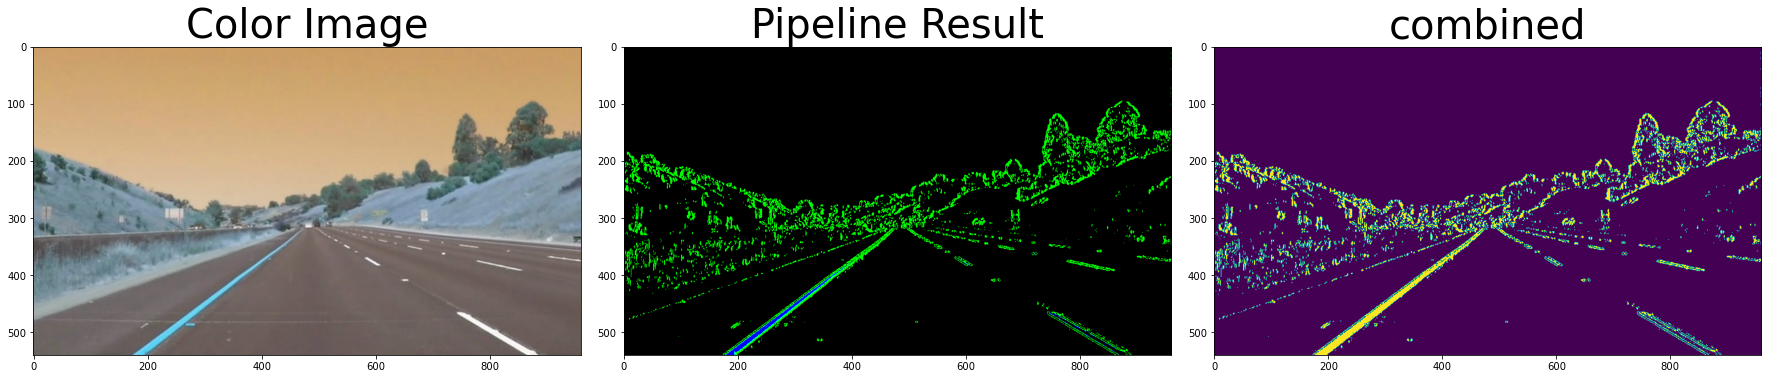

In [124]:
import os
path = 'test_images/'
for i in os.listdir(path):
    read = cv2.imread(path+i)
    f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    color, combined = highlight_features(read)
    ax1.imshow(read)
    ax1.set_title('Color Image', fontsize=40)
    ax2.imshow(color)
    ax2.set_title('Pipeline Result', fontsize=40)
    ax3.imshow(combined)
    ax3.set_title('combined', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
def get_region